<a href="https://colab.research.google.com/github/tekchandk/Covid-19/blob/plots/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import tensorflow as tf
import numpy as np
import pandas as pd 
from google.colab import files
uploaded = files.upload()

Saving covid_19_04.csv to covid_19_04 (1).csv


In [0]:
df = pd.read_csv ("covid_19_04.csv", delimiter=',')
df.drop(['day', 'month', 'year', 'geoId', 'continentExp'], axis = 1) 
df.set_index('countriesAndTerritories', inplace=True)


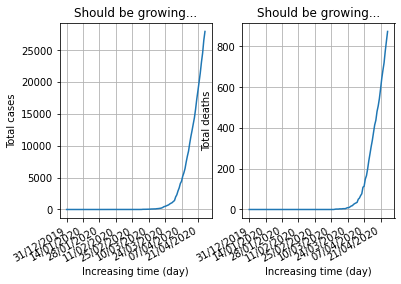

In [165]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
df
country_name ="India"
time_interval = 15
country_wise_data = df.loc[[country_name]]
cumulative_case_country_wise =[]
total_cases = country_wise_data['cases'].sum()

cumulative_death_country_wise =[]
total_deaths = country_wise_data['deaths'].sum()

for x in range(0, len(country_wise_data['cases'] - 1)):
  cumulative_case_country_wise.append(total_cases)
  total_cases = total_cases - country_wise_data.cases[x]
country_wise_data['Cumultive_Cases'] = cumulative_case_country_wise



for x in range(0, len(country_wise_data['deaths'] - 1)):
  cumulative_death_country_wise.append(total_deaths)
  total_deaths = total_deaths - country_wise_data.deaths[x]
country_wise_data['Cumultive_Deaths'] = cumulative_death_country_wise

plt.close('all')
fig, (case, death) = plt.subplots(1, 2)
death.fmt_xdata= mdates.DateFormatter('%d/%m/%Y')

country_wise_data.dateRep = pd.to_datetime(country_wise_data.dateRep, errors='coerce', format="%d/%m/%Y")
# Define the date format
date_form = mdates.DateFormatter('%d/%m/%Y')

case.plot(country_wise_data.dateRep, country_wise_data.Cumultive_Cases)
case.set_xlabel('Increasing time (day)')
case.set_ylabel('Total cases')
case.set_title('Should be growing...')
case.grid(True)
case.xaxis_date()
case.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=2) 
case.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))


death.plot(country_wise_data.dateRep, country_wise_data.Cumultive_Deaths)
death.set_xlabel('Increasing time (day)')
death.set_ylabel('Total deaths')
death.set_title('Should be growing...')
death.grid(True)
death.xaxis_date()
death.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=2) 
death.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))


# #death.set_xticks(np.arange(min(country_wise_data.dateRep), max(country_wise_data.dateRep)))
# # date_form = DateFormatter("%m-%d-%Y")
# # death.xaxis.set_major_formatter(date_form)
# # # Ensure a major tick for each week using (interval=1) 
# # death.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
death.format_xdata = mdates.DateFormatter("%d/%m/%Y")

# # rotate and align the tick labels so they look better
fig.autofmt_xdate()



In [0]:
# use ANN model to predict the total cases and deaths in a specific country


